## A User Centric Machine Leaning Framework for Cyber Security Operations Center

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('Train_data.csv')


In [7]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [9]:
df = data.drop(['wrong_fragment', 'urgent', 'num_failed_logins', 'num_file_creations', 'num_shells','num_outbound_cmds'], axis=1)

In [10]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   hot                          25192 non-null  int64  
 8   logged_in                    25192 non-null  int64  
 9   num_compromised              25192 non-null  int64  
 10  root_shell                   25192 non-null  int64  
 11  su_attempted                 25192 non-null  int64  
 12  num_root                     25192 non-null  int64  
 13  num_access_files

In [12]:
df.describe()

,duration,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.198039,0.394768,0.227850,0.001548,0.001350,0.249841,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,2.154202,0.488811,10.417352,0.039316,0.048785,11.500842,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,77.000000,1.000000,884.000000,1.000000,2.000000,975.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df['protocol_type'].value_counts()
df['service'].value_counts()
df['flag'].value_counts()


SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [14]:
protocol_type = {'tcp': 0, 'udp': 1, 'icmp': 2}
protocol_type.items()
df.protocol_type = [protocol_type[item] for item in df.protocol_type]
df.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,http,SF,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,http,SF,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

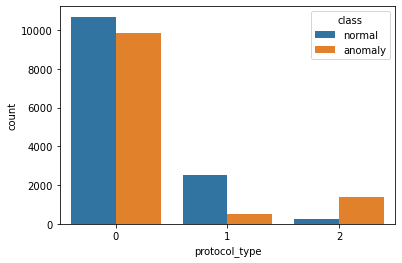

In [15]:
sns.countplot(x='protocol_type',hue='class',data=df)

In [17]:
duration = df['duration']
df['duration'] = np.where((df.duration <= 2), 0, 1)
df.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,http,SF,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,http,SF,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [18]:
service = {'aol': 1, 'auth': 2, 'bgp': 3, 'courier': 4, 'csnet_ns': 5, 'ctf': 6, 'daytime': 7, 'discard': 8,
                 'domain': 9, 'domain_u': 10, 'echo': 11, 'eco_i': 12, 'ecr_i': 13, 'efs': 14, 'exec': 15,
                 'finger': 16, 'ftp': 17, 'ftp_data': 18, 'gopher': 19, 'harvest': 20, 'hostnames': 21, 'http': 22,
                 'http_2784': 23, 'http_443': 24, 'http_8001': 25, 'imap4': 26, 'IRC': 27, 'iso_tsap': 28,
                 'klogin': 29, 'kshell': 30, 'ldap': 31, 'link': 32, 'login': 33, 'mtp': 34, 'name': 35,
                 'netbios_dgm': 36, 'netbios_ns': 37, 'netbios_ssn': 38, 'netstat': 39, 'nnsp': 40, 'nntp': 41,
                 'ntp_u': 42, 'other': 43, 'pm_dump': 44, 'pop_2': 45, 'pop_3': 46, 'printer': 47, 'private': 48,
                 'red_i': 49, 'remote_job': 50, 'rje': 51, 'shell': 52, 'smtp': 53, 'sql_net': 54, 'ssh': 55,
                 'sunrpc': 56, 'supdup': 57, 'systat': 58, 'telnet': 59, 'tftp_u': 60, 'tim_i': 61, 'time': 62,
                 'urh_i': 63, 'urp_i': 64, 'uucp': 65, 'uucp_path': 66, 'vmnet': 67, 'whois': 68, 'X11': 69,
                 'Z39_50': 70}
service.items()


dict_items([('aol', 1), ('auth', 2), ('bgp', 3), ('courier', 4), ('csnet_ns', 5), ('ctf', 6), ('daytime', 7), ('discard', 8), ('domain', 9), ('domain_u', 10), ('echo', 11), ('eco_i', 12), ('ecr_i', 13), ('efs', 14), ('exec', 15), ('finger', 16), ('ftp', 17), ('ftp_data', 18), ('gopher', 19), ('harvest', 20), ('hostnames', 21), ('http', 22), ('http_2784', 23), ('http_443', 24), ('http_8001', 25), ('imap4', 26), ('IRC', 27), ('iso_tsap', 28), ('klogin', 29), ('kshell', 30), ('ldap', 31), ('link', 32), ('login', 33), ('mtp', 34), ('name', 35), ('netbios_dgm', 36), ('netbios_ns', 37), ('netbios_ssn', 38), ('netstat', 39), ('nnsp', 40), ('nntp', 41), ('ntp_u', 42), ('other', 43), ('pm_dump', 44), ('pop_2', 45), ('pop_3', 46), ('printer', 47), ('private', 48), ('red_i', 49), ('remote_job', 50), ('rje', 51), ('shell', 52), ('smtp', 53), ('sql_net', 54), ('ssh', 55), ('sunrpc', 56), ('supdup', 57), ('systat', 58), ('telnet', 59), ('tftp_u', 60), ('tim_i', 61), ('time', 62), ('urh_i', 63), ('ur

<AxesSubplot:xlabel='service', ylabel='count'>

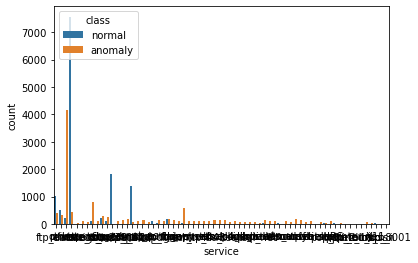

In [19]:
sns.countplot(x='service',hue='class',data=df)

In [20]:
df.service = [service[item] for item in df.service]
df.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,18,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,43,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,48,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,22,SF,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,22,SF,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,0,48,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,0,48,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,0,48,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,0,50,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,0,48,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [21]:
flag = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'S1': 5, 'SH': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9,
              'OTH': 10}


In [22]:
flag.items()


dict_items([('SF', 0), ('S0', 1), ('REJ', 2), ('RSTR', 3), ('RSTO', 4), ('S1', 5), ('SH', 6), ('S2', 7), ('RSTOS0', 8), ('S3', 9), ('OTH', 10)])

<AxesSubplot:xlabel='flag', ylabel='count'>

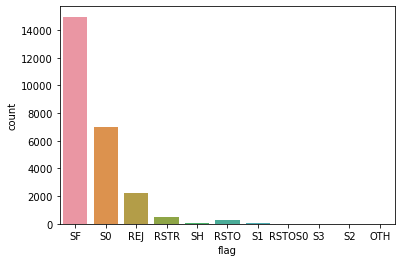

In [23]:
sns.countplot(x='flag',data=df)

<AxesSubplot:xlabel='service', ylabel='count'>

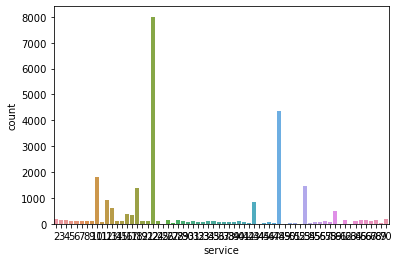

In [26]:
sns.countplot(x='service',data=df)

In [27]:
#Splitting the data into training ans testing test set
train,test = train_test_split(df, test_size= 0.2)

In [28]:
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values


In [29]:
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)
y_pred_LR = classifier_LR.predict(X_test)
cm_LR = confusion_matrix(y_test, y_pred_LR)
accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
dic_LR = {'s':cm_LR, 's1':accuracy_LR}
    

C:\Users\Koduri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

     anomaly       0.88      0.84      0.86      2311
      normal       0.87      0.91      0.89      2728

    accuracy                           0.88      5039
   macro avg       0.88      0.87      0.88      5039
weighted avg       0.88      0.88      0.88      5039



<AxesSubplot:xlabel='flag', ylabel='count'>

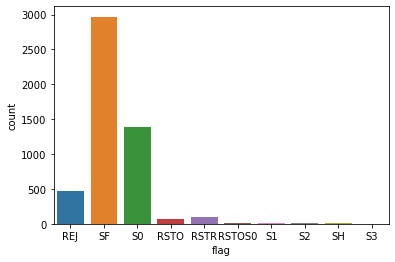

In [31]:
sns.countplot(x='flag',data=kdd_test_clean)

In [32]:
accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)

In [33]:
accuracy_LR

0.8767612621551896

In [34]:
accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)

In [35]:
classifier_RF = RandomForestClassifier(n_estimators = 100, random_state=101)
classifier_RF.fit(X_train,y_train)
y_pred_RF = classifier_RF.predict(X_test)
cm_RF = confusion_matrix(y_test,y_pred_RF)
accuracy_RF = metrics.accuracy_score(y_test,y_pred_RF)
dic_RF = {'s': cm_RF, 's1': accuracy_RF}

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2311
      normal       1.00      1.00      1.00      2728

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [37]:
accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)

In [38]:
accuracy_RF

0.9978170271879341